## Jupyter Notebook to present method and results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

Using below Kaggle dataset for project

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


## Dataset Attributes

Age : age of the patient [years]

Sex : sex of the patient [M: Male, F: Female]

ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP : resting blood pressure [mm Hg]

Cholesterol : serum cholesterol [mm/dl]

FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina : exercise-induced angina [Y: Yes, N: No]

Oldpeak : oldpeak = ST [Numeric value measured in depression]

ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease : output class [1: heart disease, 0: Normal]

In [3]:
# read in data and review head
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [4]:
# observe the shape of the data
df.shape

(918, 12)

In [5]:
# review columns
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [83]:
# Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Age  is :  0
Count of zeros in column  Sex  is :  0
Count of zeros in column  ChestPainType  is :  0
Count of zeros in column  RestingBP  is :  1
Count of zeros in column  Cholesterol  is :  172
Count of zeros in column  FastingBS  is :  704
Count of zeros in column  RestingECG  is :  0
Count of zeros in column  MaxHR  is :  0
Count of zeros in column  ExerciseAngina  is :  0
Count of zeros in column  Oldpeak  is :  368
Count of zeros in column  ST_Slope  is :  0
Count of zeros in column  HeartDisease  is :  410


In [84]:
# isolate string columns
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [85]:
# describe the dataset
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [86]:
# get info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


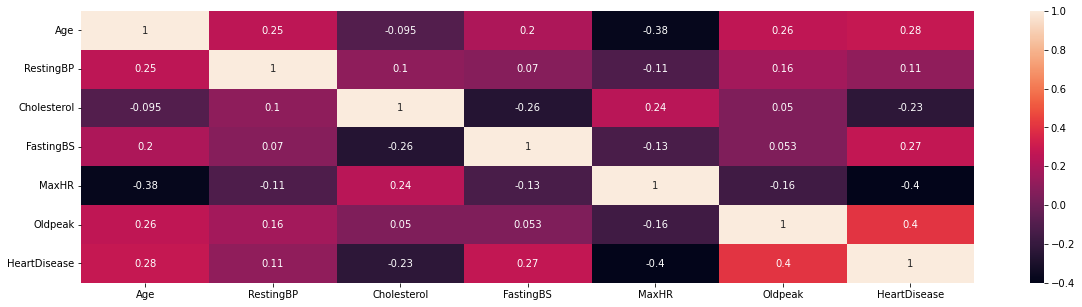

In [87]:
#plote correlation heatmap
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(),annot = True);

In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


[]

<Figure size 1080x720 with 0 Axes>

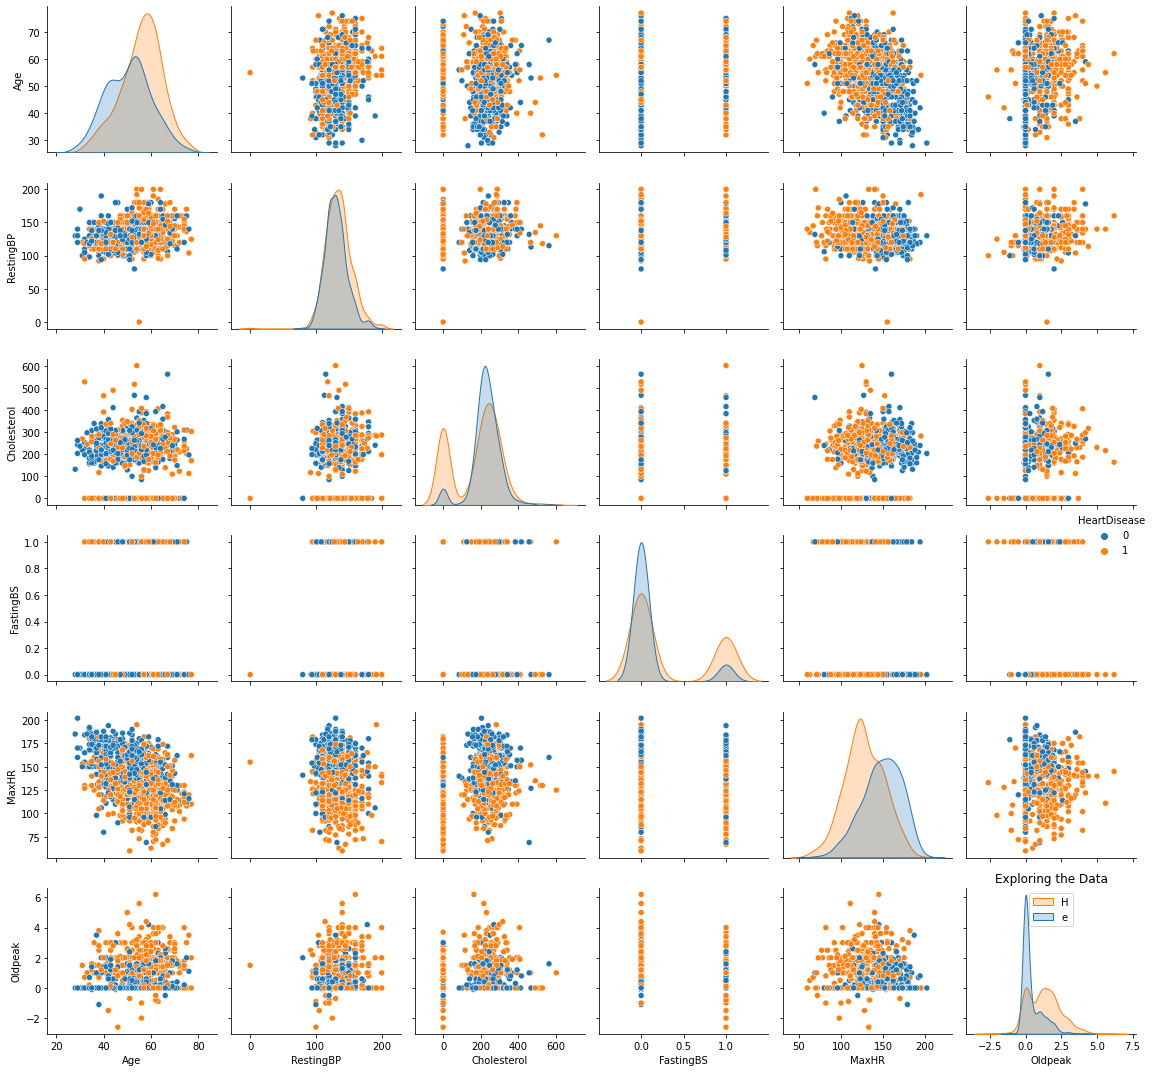

In [89]:
# use seaborn pairplot to review correlations, outliers and zero values of features 
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Exploring the Data")
plt.legend("Heart Disease",loc="upper center")

plt.tight_layout()
plt.plot()

In [90]:
# review distribution of Categorical/String Values
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical values in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical values in the Sex is : 
M    725
F    193
Name: Sex, dtype: Int64
The distribution of categorical values in the ChestPainType is : 
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: Int64
The distribution of categorical values in the RestingECG is : 
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: Int64
The distribution of categorical values in the ExerciseAngina is : 
N    547
Y    371
Name: ExerciseAngina, dtype: Int64
The distribution of categorical values in the ST_Slope is : 
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: Int64


In [91]:
# Apply a label encoder to transform the categorical features.
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [92]:
# As we will be using both types of approches for demonstration lets do First Label Ecoding 
# which will be used with Tree Based Algorthms
df_tree = df.apply(LabelEncoder().fit_transform)


# Getting the target column into y
target="HeartDisease"
y=df_tree[target].values

feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

df_tree.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [93]:
# run model using straified k-fold

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score, roc_curve

acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        82
           1       0.92      0.82      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for 1 : 0.8690817790530847
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        82
           1       0.92      0.79      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for 2 : 0.8543758967001435
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.98      0.63      0.77        82
           1       0.77      0.99      0.87       102

    accuracy                           0.83  

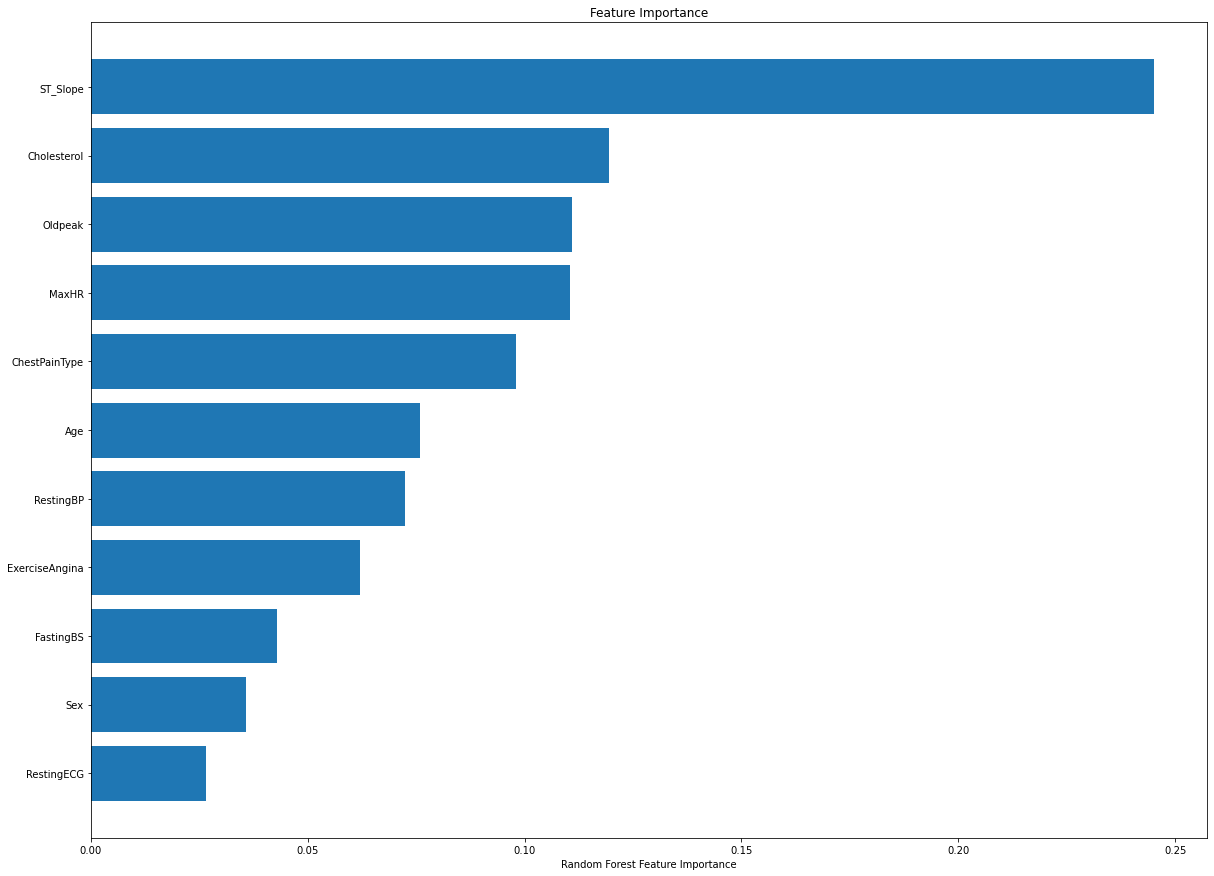

In [94]:
## Checking Feature importance 

plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

In [95]:
# split data into 75% training and 25% test data

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

X = df_tree.drop(target, axis=1)
y = df_tree[target]
  
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.25,
                                       random_state=42)
df_tree.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape


((918, 12), (688, 11), (230, 11), (688,), (230,))

In [96]:
# Fit and test model using standard settings

model = RandomForestClassifier()
model.fit(X_train, y_train)
  
# predict the mode
y_pred = model.predict(X_test)
  
# performance evaluatio metrics
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       103
           1       0.88      0.91      0.90       127

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



In [97]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [98]:
# tune parameters using grid search
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_leaf_nodes=6, n_estimators=50)


In [99]:
#input best parameters into model and review changes
model_grid = RandomForestClassifier(max_depth=9,
                                    max_features="log2",
                                    max_leaf_nodes=9,
                                    n_estimators=25)
model_grid.fit(X_train, y_train)
y_pred_grid = model_grid.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86        96
           1       0.90      0.89      0.89       134

    accuracy                           0.88       230
   macro avg       0.87      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



In [100]:

random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=3, max_leaf_nodes=9)


In [101]:
model_random = RandomForestClassifier(max_depth=6,
                                      max_features='log2',
                                      max_leaf_nodes=9,
                                      n_estimators=100)
model_random.fit(X_train, y_train)
y_pred_rand = model_random.predict(X_test)
print(classification_report(y_pred_rand, y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       102
           1       0.87      0.90      0.88       128

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



In [102]:
# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 42)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=42)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200])},
                   random_state=42, scoring='roc_auc', verbose=1)

In [103]:
rs.best_params_

{'n_estimators': 157,
 'min_samples_split': 2,
 'max_leaf_nodes': 31,
 'max_features': 'auto',
 'max_depth': 14,
 'bootstrap': True}

## Final Model - Use best parameters to fit new model

In [104]:
model_random2 = RandomForestClassifier(max_depth=14,
                                      max_features='auto',
                                      max_leaf_nodes=31,
                                      n_estimators=157,
                                     min_samples_split=2,
                                     bootstrap=True,
                                     random_state=42)
model_random2.fit(X_train, y_train)
y_pred_rand2 = model_random2.predict(X_test)
print(classification_report(y_pred_rand2, y_test))


              precision    recall  f1-score   support

           0       0.86      0.87      0.86        97
           1       0.90      0.89      0.90       133

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



## Review Confusion matrices for all models

In [105]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 87  11]
 [ 16 116]]


In [106]:
cm=confusion_matrix(y_test,y_pred_rand2)
print(cm)

[[ 84  14]
 [ 13 119]]


In [107]:
cm=confusion_matrix(y_test,y_pred_rand)
print(cm)

[[ 85  13]
 [ 17 115]]


In [108]:
cm=confusion_matrix(y_test,y_pred_grid)
print(cm)

[[ 83  15]
 [ 13 119]]


In [109]:
print(y_pred.shape)

(230,)


In [110]:

models=['Random Forest Classifier - default','Random Forest Classifier - after hyperparameter optimisation']
accuracy=[y_pred,y_pred_rand2]

for i,j in zip(models,accuracy):
  print("Accuracy for {} : {}".format(i,accuracy_score(y_test,j)))

Accuracy for Random Forest Classifier - default : 0.8826086956521739
Accuracy for Random Forest Classifier - after hyperparameter optimisation : 0.8826086956521739


In [111]:
r_probs=[0 for i in range(len(y_test))]
y1_pred_prob=model.predict_proba(X_test)[::,1]
y2_pred_prob=model_random2.predict_proba(X_test)[::,1]

In [112]:
fpr1, tpr1, _a = roc_curve(y_test,  y1_pred_prob)
fpr2,tpr2,_b= roc_curve(y_test,  y2_pred_prob)
fpr4,tpr4,_d= roc_curve(y_test,  r_probs)

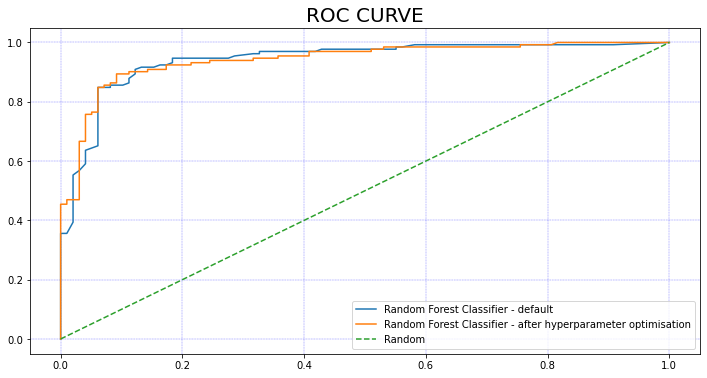

In [125]:
# create plots for basic and final tuned model into ROC Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(fpr1,tpr1,label="Random Forest Classifier - default")
plt.plot(fpr2,tpr2,label="Random Forest Classifier - after hyperparameter optimisation")
plt.plot(fpr4,tpr4,'--',label="Random")
plt.title('ROC CURVE',fontsize=20)

plt.legend(loc=4)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()

In [114]:
auc_score=[roc_auc_score(y_test,i) for i in [y1_pred_prob,y2_pred_prob] ]

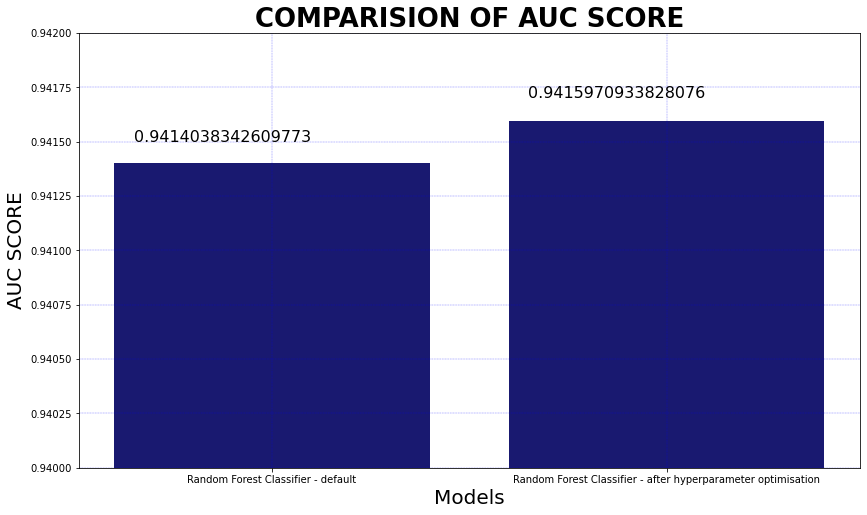

In [124]:
# Create bar chart plot to show different AUC Score
plt.figure(figsize=(14,8))
plt.bar(models,auc_score,color='midnightblue',width=0.8)
plt.xlabel('Models',fontsize=20)
plt.ylabel('AUC SCORE',fontsize=20)
plt.title('COMPARISION OF AUC SCORE',fontsize=26,weight='bold')
plt.ylim(top=0.942)
plt.ylim(bottom=0.94)
plt.grid(color='b',ls='-.',lw=0.25)

#for displaying the value above plot
plt.text(-.35,0.9415,str(auc_score[0]),fontsize=16)
plt.text(0.65,0.9417,str(auc_score[1]),fontsize=16)
plt.show()